In [1]:
# ! pip install missingno

In [2]:
# import dependencies 
import pandas as pd
import numpy as np
import missingno as mno
from scipy.stats import ttest_ind

In [3]:
# loading data
file_to_load = "../Resources/data.csv"

no_touch_data = pd.read_csv(file_to_load)
titanic_data = no_touch_data.copy()
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


Regression Substitution/imputation

<AxesSubplot:>

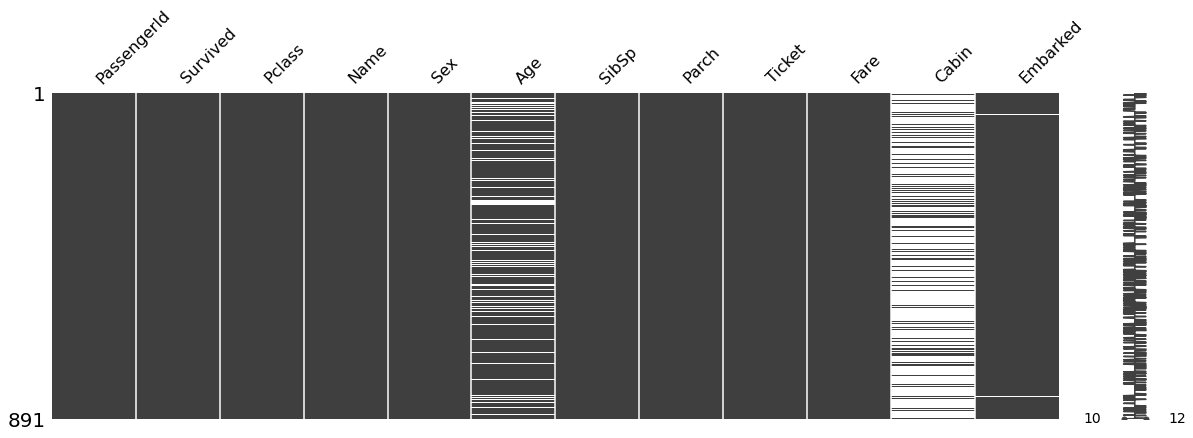

In [4]:
# checking which column has missing values 
mno.matrix(titanic_data, figsize = (20,6))

In [5]:
# setting missing columns up for simple random imputation
missing_columns= titanic_data[["Age","Cabin","Embarked"]]

In [6]:
mean = missing_columns.Age.mean()

In [7]:
median = missing_columns.Age.median()

In [8]:
missing_columns.Age.fillna(mean)

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [9]:
titanic_data["Age_imp_median"] = missing_columns.Age.fillna(median)
titanic_data["Age_imp_mean"] = missing_columns.Age.fillna(mean)
# chose medain because less sensitive for outliers 

In [10]:
titanic_data.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [11]:
titanic_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.000000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.000000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292
Age_imp_median,891.0,29.361582,13.019697,0.42,22.0000,28.000000,35.0,80.0000
Age_imp_mean,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000


In [12]:
print(titanic_data["Age"].skew(),titanic_data['Age_imp_mean'].skew(),
     titanic_data['Age_imp_median'].skew())

0.38910778230082704 0.4344880940129925 0.5102446555756495


<AxesSubplot:>

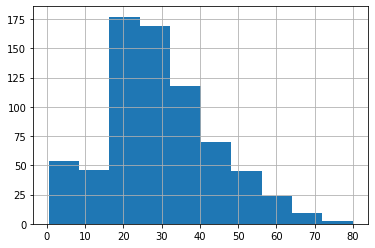

In [13]:
titanic_data["Age"].hist()

<AxesSubplot:>

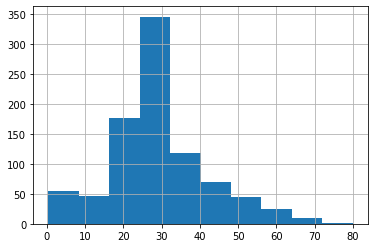

In [14]:
titanic_data["Age_imp_mean"].hist()

<AxesSubplot:>

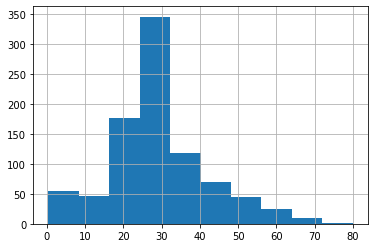

In [15]:
titanic_data["Age_imp_median"].hist()

<AxesSubplot:>

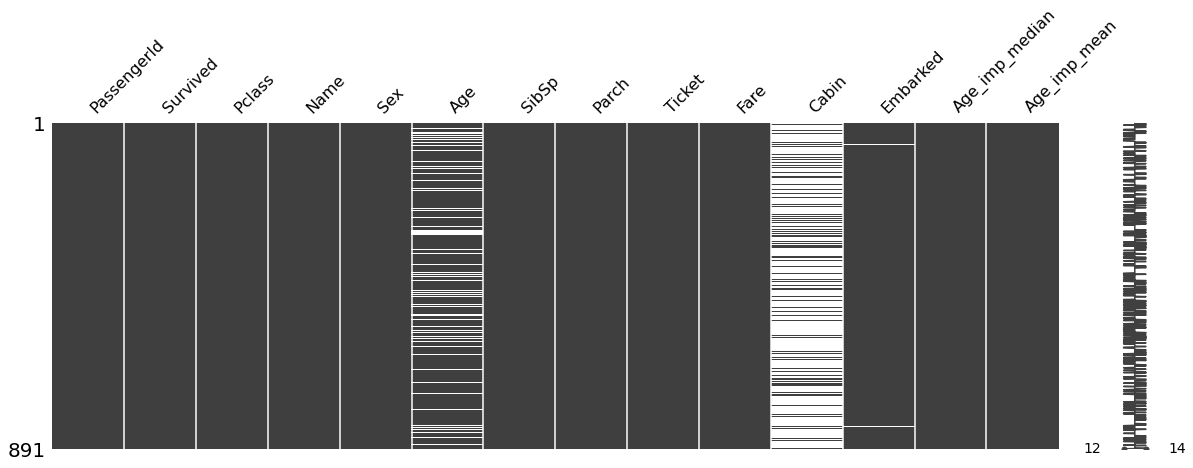

In [16]:
mno.matrix(titanic_data, figsize = (20,6))

In [20]:
titanic_data['Name_title'] = titanic_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [21]:
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_imp_median,Age_imp_mean,Cabin_decks,Name_title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,NaN,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,C,Mrs


In [17]:
# creating new CSV with updated data
full_titanic = titanic_data
full_titanic.to_csv(r'../Resources/full_titanic.csv')

In [18]:
titanic_data['Cabin_decks'] = titanic_data['Cabin'].str.replace('\d+','')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_imp_median,Age_imp_mean,Cabin_decks
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0,NaN


T-Test

In [19]:
cat1 = titanic_data['Fare']
cat2 = titanic_data['Survived']

ttest_ind(cat1, cat2)

Ttest_indResult(statistic=19.112798902198033, pvalue=3.2324176960886792e-74)